<a href="https://colab.research.google.com/github/roguxivlo/machine-learning-24L/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**

-------------------------------

In this assignment, you will explore the concept of **classification thresholds** in **Logistic Regression** and investigate whether the commonly used threshold of **0.5** is always the optimal choice. To complete this assignment, you will need to conduct **additional reading** on **ROC curves** and the **AUC metric**, beyond the materials covered in class.

This exercise focuses on the **importance of threshold selection** and how it impacts model performance based on different evaluation criteria.



## **The Objective**

**Is a 0.5 threshold always the best choice in Logistic Regression?**

- Analyze if the standard threshold of **0.5** always yields the most desirable results in various scenarios.
- Investigate alternative thresholds and how they can improve model performance depending on the problem context.



## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.



## **Tasks & Deliverables**

1. **Colab Notebook**
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

2. **Answer the Questions:**
   - Use markdown cells to provide explanations.
   - Answer all helper questions with supporting evidence from your plots and results.

3. **Visualizations:**
   - **ROC curve** based on the **validation** set with threshold points marked.
   - Highlight the **optimal threshold** on the ROC curve.

4. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




<a href="https://colab.research.google.com/github/roguxivlo/machine-learning-24L/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

## Primary question

How can we visualize the decision boundary for attributing a new (unlabeled) point to one of the GMM clusters?

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) which cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot lines separating clusters or use a color map showing each point's "most likely cluster".

You can illustrate your approach with the same 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

# Primary Question Answer
Let's firstly use the code from the classes to generate the mouse dataset

In [ ]:
# Code from classes

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)  # for reproducibility

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])
N, d = data_X.shape  # should be (500, 2)

Now we use the code from the classes to fit GM model to our data.

In [ ]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D  # Import Line2D for custom legend
from matplotlib.colors import ListedColormap

# EM for Gaussian Mixtures
gm_model = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gm_model.fit(data_X)
gm_labels = gm_model.predict(data_X)

print(gm_model.means_)
print(gm_model.covariances_)

[[ 0.76685767  0.74738792]
 [-0.79619442  0.81734276]
 [-0.05172985 -0.02233533]]
[[[ 0.03448645  0.00195799]
  [ 0.00195799  0.04676817]]

 [[ 0.03096687 -0.00175913]
  [-0.00175913  0.04101211]]

 [[ 0.15485967 -0.00902081]
  [-0.00902081  0.15592878]]]


Now let's visualize the decision bounds. The idea is to take the region $[-1.5, 1.5]^2$, 
then take a lot of points evenly distributed in that square, for each of them predict the most likely cluster,
and then plot the decision boundaries for that data using `plt.contourf`. I also added original data points for reference

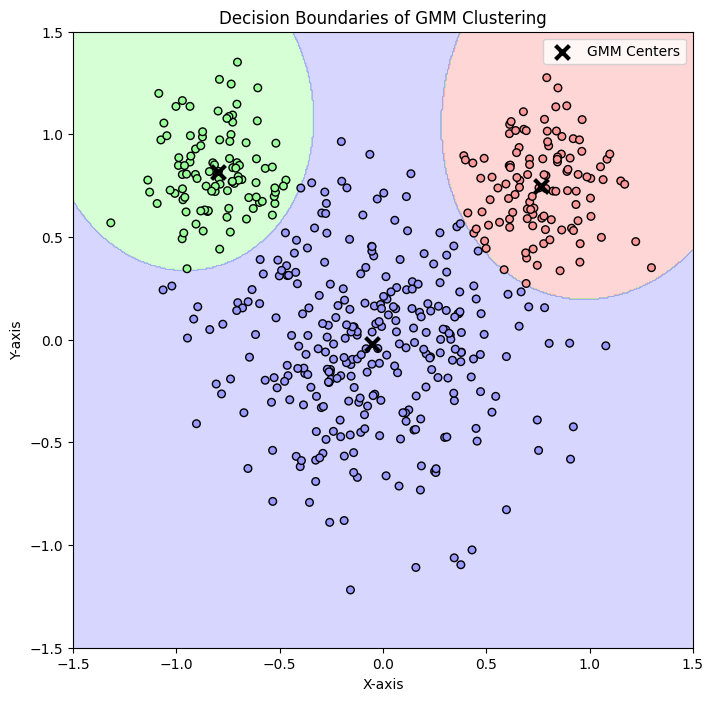

In [ ]:
x_min, x_max = (-1.5, 1.5)
y_min, y_max = (-1.5, 1.5)

density = 500

xx, yy = np.meshgrid(np.linspace(x_min, x_max, density), 
                     np.linspace(y_min, y_max, density))


points = np.c_[xx.ravel(), yy.ravel()]

probs = gm_model.predict_proba(points)

grid_labels = np.argmax(probs, axis=1)

grid_labels = grid_labels.reshape(xx.shape)

cmap = ListedColormap(['#ff9999', '#99ff99', '#9999ff'])

# Plot the decision boundary
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, grid_labels, cmap=cmap, alpha=0.4)  # Colored regions

# Scatter plot of original data points
plt.scatter(data_X[:, 0], data_X[:, 1], c=gm_labels, cmap=cmap, edgecolors='k', marker='o', s=30)

# Plot Gaussian centers
plt.scatter(gm_model.means_[:, 0], gm_model.means_[:, 1], c='black', marker='x', s=100, linewidth=3, label="GMM Centers")

plt.title("Decision Boundaries of GMM Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

## Conclusion
We have obtained nice decision bounds that match the data well.

# Secondary Question

If we didn't know the number of clusters in advance, how could we decide on a suitable K for the clustering algorithm?

You can illustrate your approach with the same dataset as in the primary question by trying different values of K (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## Solution

We shall use the same dataset as before. Supposing $K$ is unknown, we can evaluate the results for different possible values of $K$ using Silhouette Score.

Additionally, since EM algorithm optimises for log-likelihood, we will plot the value it ends up with against the $K$ values.

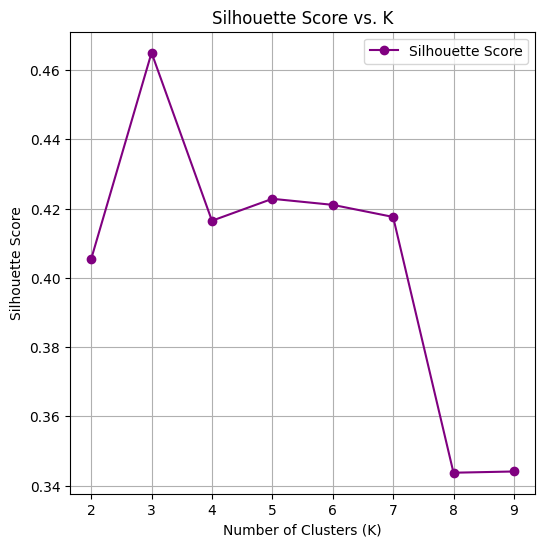

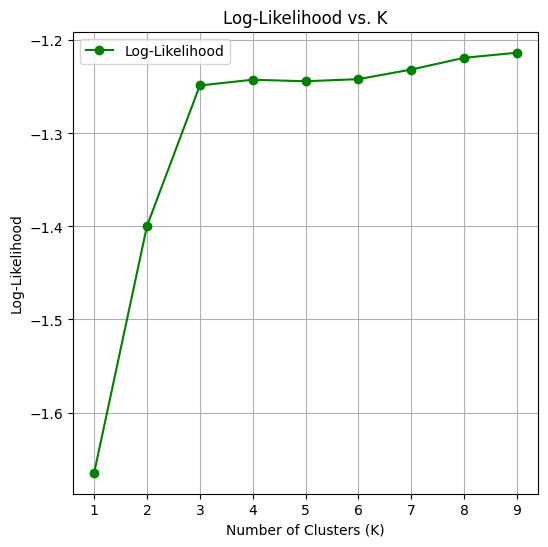

In [ ]:
from sklearn.metrics import silhouette_score

# Use the dataset from before
K_vals = range(1, 10) # Evaluate for K = 1, 2, ..., 10

silhouette_scores = []
log_likelihoods = []

for k in K_vals:
    gm_model_k_unknown = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gm_model_k_unknown.fit(data_X)
    gm_labels = gm_model_k_unknown.predict(data_X)

    if k > 1: silhouette_scores.append(silhouette_score(data_X, gm_labels))
    else: silhouette_scores.append(None)

    log_likelihoods.append(gm_model_k_unknown.score(data_X))  # Average log-likelihood

fig, ax1 = plt.subplots(figsize=(6, 6))

plt.plot(K_vals, silhouette_scores, marker='o', color='purple', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.legend()
plt.grid()

plt.figure(figsize=(6, 6))
plt.plot(K_vals, log_likelihoods, marker='o', color='green', label='Log-Likelihood')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. K')
plt.legend()
plt.grid()


## Conclusions

From these experiments the following can be deduced:

- Silhouette Score metric has a clear maximum for $K=3$
- Log likelihood increases along with the value of $K$. However, the curve practically flattens after $K = 3$, suggesting that for bigger values the model overfits

Taking into account these two variables, we can infer that a reasonable choice would be $K=3$ (which is the actual value in our case)

<a href="https://colab.research.google.com/github/roguxivlo/machine-learning-24L/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

## Primary question

How can we visualize the decision boundary for attributing a new (unlabeled) point to one of the GMM clusters?

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) which cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot lines separating clusters or use a color map showing each point's "most likely cluster".

You can illustrate your approach with the same 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

# Primary Question Answer
Let's firstly use the code from the classes to generate the mouse dataset

In [ ]:
# Code from classes

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)  # for reproducibility

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])
N, d = data_X.shape  # should be (500, 2)

Now we use the code from the classes to fit GM model to our data.

In [ ]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D  # Import Line2D for custom legend
from matplotlib.colors import ListedColormap

# EM for Gaussian Mixtures
gm_model = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gm_model.fit(data_X)
gm_labels = gm_model.predict(data_X)

print(gm_model.means_)
print(gm_model.covariances_)

[[ 0.76685767  0.74738792]
 [-0.79619442  0.81734276]
 [-0.05172985 -0.02233533]]
[[[ 0.03448645  0.00195799]
  [ 0.00195799  0.04676817]]

 [[ 0.03096687 -0.00175913]
  [-0.00175913  0.04101211]]

 [[ 0.15485967 -0.00902081]
  [-0.00902081  0.15592878]]]


Now let's visualize the decision bounds. The idea is to take the region $[-1.5, 1.5]^2$, 
then take a lot of points evenly distributed in that square, for each of them predict the most likely cluster,
and then plot the decision boundaries for that data using `plt.contourf`. I also added original data points for reference

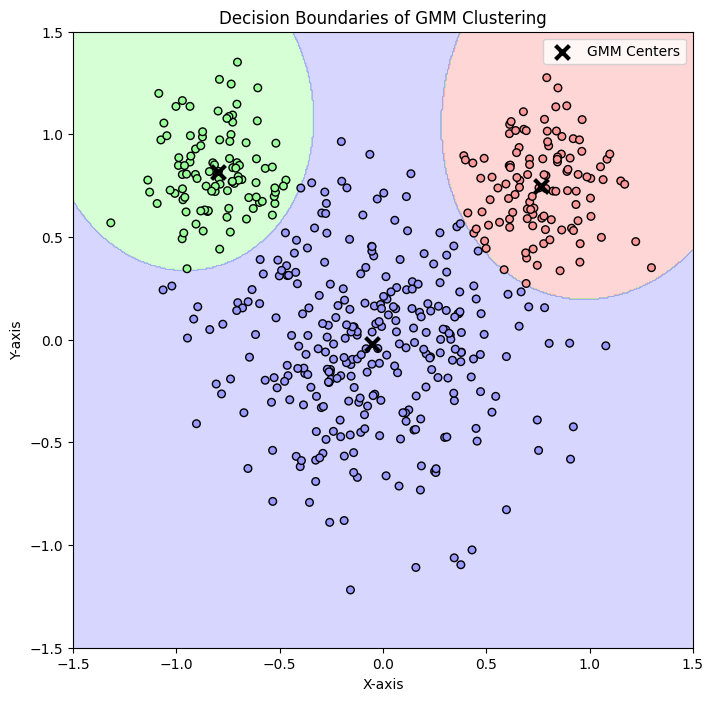

In [ ]:
x_min, x_max = (-1.5, 1.5)
y_min, y_max = (-1.5, 1.5)

density = 500

xx, yy = np.meshgrid(np.linspace(x_min, x_max, density), 
                     np.linspace(y_min, y_max, density))


points = np.c_[xx.ravel(), yy.ravel()]

probs = gm_model.predict_proba(points)

grid_labels = np.argmax(probs, axis=1)

grid_labels = grid_labels.reshape(xx.shape)

cmap = ListedColormap(['#ff9999', '#99ff99', '#9999ff'])

# Plot the decision boundary
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, grid_labels, cmap=cmap, alpha=0.4)  # Colored regions

# Scatter plot of original data points
plt.scatter(data_X[:, 0], data_X[:, 1], c=gm_labels, cmap=cmap, edgecolors='k', marker='o', s=30)

# Plot Gaussian centers
plt.scatter(gm_model.means_[:, 0], gm_model.means_[:, 1], c='black', marker='x', s=100, linewidth=3, label="GMM Centers")

plt.title("Decision Boundaries of GMM Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

## Conclusion
We have obtained nice decision bounds that match the data well.

# Secondary Question

If we didn't know the number of clusters in advance, how could we decide on a suitable K for the clustering algorithm?

You can illustrate your approach with the same dataset as in the primary question by trying different values of K (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## Solution

We shall use the same dataset as before. Supposing $K$ is unknown, we can evaluate the results for different possible values of $K$ using Silhouette Score.

Additionally, since EM algorithm optimises for log-likelihood, we will plot the value it ends up with against the $K$ values.

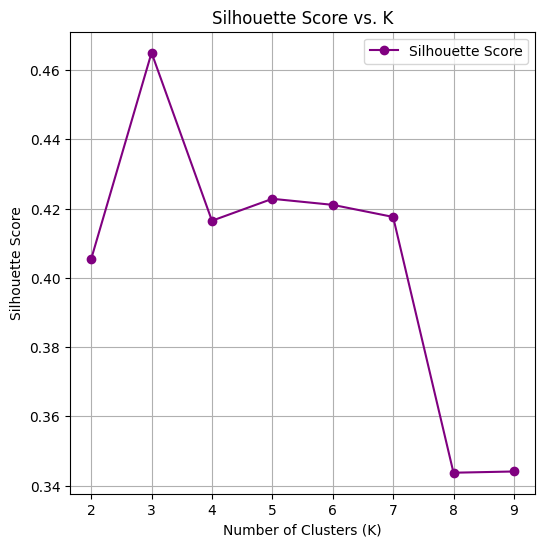

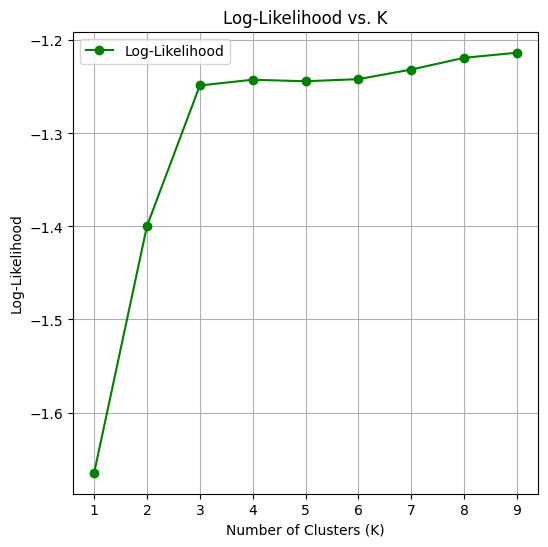

In [ ]:
from sklearn.metrics import silhouette_score

# Use the dataset from before
K_vals = range(1, 10) # Evaluate for K = 1, 2, ..., 10

silhouette_scores = []
log_likelihoods = []

for k in K_vals:
    gm_model_k_unknown = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gm_model_k_unknown.fit(data_X)
    gm_labels = gm_model_k_unknown.predict(data_X)

    if k > 1: silhouette_scores.append(silhouette_score(data_X, gm_labels))
    else: silhouette_scores.append(None)

    log_likelihoods.append(gm_model_k_unknown.score(data_X))  # Average log-likelihood

fig, ax1 = plt.subplots(figsize=(6, 6))

plt.plot(K_vals, silhouette_scores, marker='o', color='purple', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.legend()
plt.grid()

plt.figure(figsize=(6, 6))
plt.plot(K_vals, log_likelihoods, marker='o', color='green', label='Log-Likelihood')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. K')
plt.legend()
plt.grid()


## Conclusions

From these experiments the following can be deduced:

- Silhouette Score metric has a clear maximum for $K=3$
- Log likelihood increases along with the value of $K$. However, the curve practically flattens after $K = 3$, suggesting that for bigger values the model overfits

Taking into account these two variables, we can infer that a reasonable choice would be $K=3$ (which is the actual value in our case)

<a href="https://colab.research.google.com/github/roguxivlo/machine-learning-24L/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

## Primary question

How can we visualize the decision boundary for attributing a new (unlabeled) point to one of the GMM clusters?

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) which cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot lines separating clusters or use a color map showing each point's "most likely cluster".

You can illustrate your approach with the same 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

# Primary Question Answer
Let's firstly use the code from the classes to generate the mouse dataset

In [ ]:
# Code from classes

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)  # for reproducibility

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])
N, d = data_X.shape  # should be (500, 2)

Now we use the code from the classes to fit GM model to our data.

In [ ]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D  # Import Line2D for custom legend
from matplotlib.colors import ListedColormap

# EM for Gaussian Mixtures
gm_model = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gm_model.fit(data_X)
gm_labels = gm_model.predict(data_X)

print(gm_model.means_)
print(gm_model.covariances_)

[[ 0.76685767  0.74738792]
 [-0.79619442  0.81734276]
 [-0.05172985 -0.02233533]]
[[[ 0.03448645  0.00195799]
  [ 0.00195799  0.04676817]]

 [[ 0.03096687 -0.00175913]
  [-0.00175913  0.04101211]]

 [[ 0.15485967 -0.00902081]
  [-0.00902081  0.15592878]]]


Now let's visualize the decision bounds. The idea is to take the region $[-1.5, 1.5]^2$, 
then take a lot of points evenly distributed in that square, for each of them predict the most likely cluster,
and then plot the decision boundaries for that data using `plt.contourf`. I also added original data points for reference

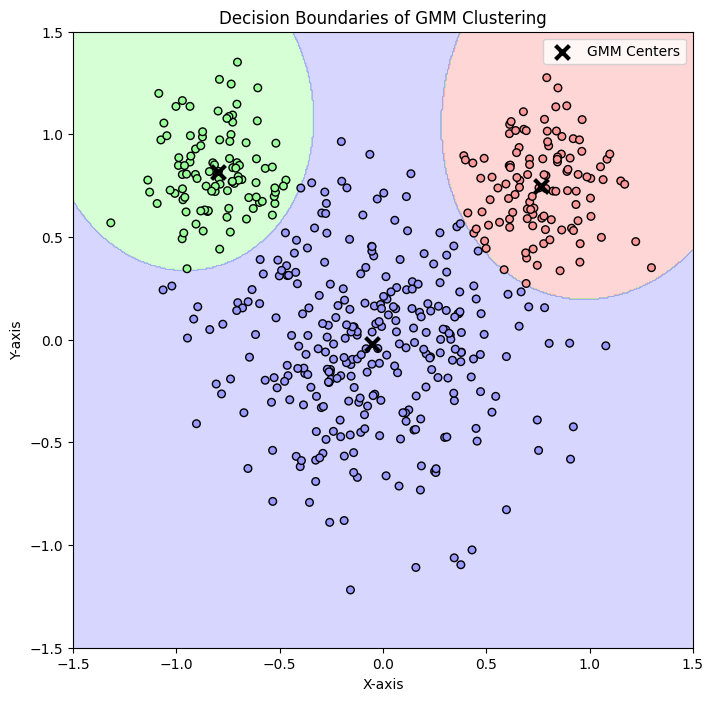

In [ ]:
x_min, x_max = (-1.5, 1.5)
y_min, y_max = (-1.5, 1.5)

density = 500

xx, yy = np.meshgrid(np.linspace(x_min, x_max, density), 
                     np.linspace(y_min, y_max, density))


points = np.c_[xx.ravel(), yy.ravel()]

probs = gm_model.predict_proba(points)

grid_labels = np.argmax(probs, axis=1)

grid_labels = grid_labels.reshape(xx.shape)

cmap = ListedColormap(['#ff9999', '#99ff99', '#9999ff'])

# Plot the decision boundary
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, grid_labels, cmap=cmap, alpha=0.4)  # Colored regions

# Scatter plot of original data points
plt.scatter(data_X[:, 0], data_X[:, 1], c=gm_labels, cmap=cmap, edgecolors='k', marker='o', s=30)

# Plot Gaussian centers
plt.scatter(gm_model.means_[:, 0], gm_model.means_[:, 1], c='black', marker='x', s=100, linewidth=3, label="GMM Centers")

plt.title("Decision Boundaries of GMM Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

## Conclusion
We have obtained nice decision bounds that match the data well.

# Secondary Question

If we didn't know the number of clusters in advance, how could we decide on a suitable K for the clustering algorithm?

You can illustrate your approach with the same dataset as in the primary question by trying different values of K (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## Solution

We shall use the same dataset as before. Supposing $K$ is unknown, we can evaluate the results for different possible values of $K$ using Silhouette Score.

Additionally, since EM algorithm optimises for log-likelihood, we will plot the value it ends up with against the $K$ values.

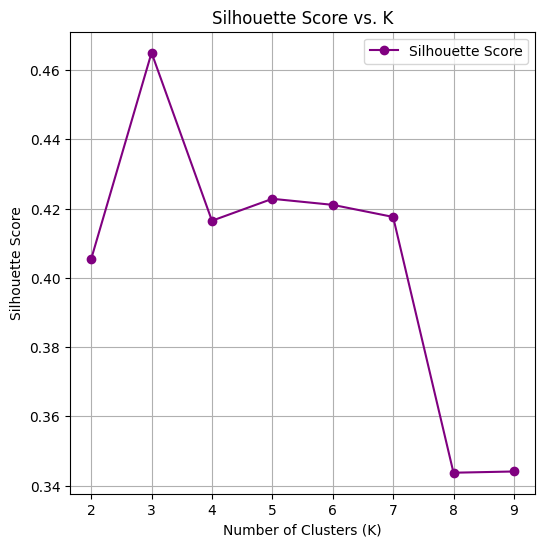

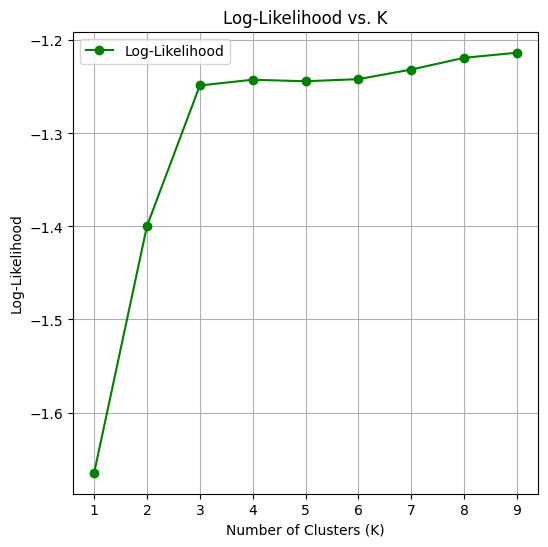

In [ ]:
from sklearn.metrics import silhouette_score

# Use the dataset from before
K_vals = range(1, 10) # Evaluate for K = 1, 2, ..., 10

silhouette_scores = []
log_likelihoods = []

for k in K_vals:
    gm_model_k_unknown = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gm_model_k_unknown.fit(data_X)
    gm_labels = gm_model_k_unknown.predict(data_X)

    if k > 1: silhouette_scores.append(silhouette_score(data_X, gm_labels))
    else: silhouette_scores.append(None)

    log_likelihoods.append(gm_model_k_unknown.score(data_X))  # Average log-likelihood

fig, ax1 = plt.subplots(figsize=(6, 6))

plt.plot(K_vals, silhouette_scores, marker='o', color='purple', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.legend()
plt.grid()

plt.figure(figsize=(6, 6))
plt.plot(K_vals, log_likelihoods, marker='o', color='green', label='Log-Likelihood')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. K')
plt.legend()
plt.grid()


## Conclusions

From these experiments the following can be deduced:

- Silhouette Score metric has a clear maximum for $K=3$
- Log likelihood increases along with the value of $K$. However, the curve practically flattens after $K = 3$, suggesting that for bigger values the model overfits

Taking into account these two variables, we can infer that a reasonable choice would be $K=3$ (which is the actual value in our case)